In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import imresize
%matplotlib inline

In [2]:
RES = (200, 200) # DESIRED RESOLUTION OF OUTPUT 

plot_args = {'interpolation' : 'nearest', 'cmap' : 'Greys'}

data_dir = "data/HO CHI MINH"
throughput_dir = 'throughput'
years      = [1990, 2000, 2010, 2015]
mask_names = ['cambodia_1', 'hydro_1', 'protected_1']


In [3]:
def f(x, delim):
    path = data_dir + '/HCM_' + str(x) + '.txt'
    print 'reading ' + path
    return np.loadtxt(path, dtype=int, delimiter=delim)

maps  = {year : f(year, '\t') for year in years}
masks = {name : f(name, ',') for name in mask_names}

reading data/HO CHI MINH/HCM_1990.txt
reading data/HO CHI MINH/HCM_2000.txt
reading data/HO CHI MINH/HCM_2010.txt
reading data/HO CHI MINH/HCM_2015.txt
reading data/HO CHI MINH/HCM_cambodia_1.txt
reading data/HO CHI MINH/HCM_hydro_1.txt
reading data/HO CHI MINH/HCM_protected_1.txt


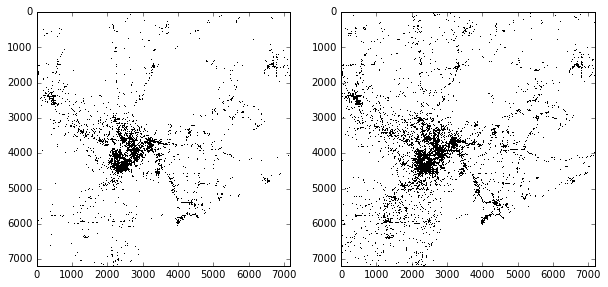

In [4]:
fig, axarr = plt.subplots(1, 2, figsize = (10, 5))
axarr[0].imshow(maps[1990], **plot_args)
axarr[1].imshow(maps[2015], **plot_args)

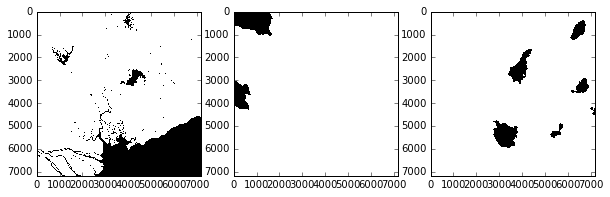

In [5]:
fig, axarr = plt.subplots(1, 3, figsize = (10, 5))
axarr[0].imshow(masks['hydro_1'], **plot_args)
axarr[1].imshow(masks['cambodia_1'], **plot_args)
axarr[2].imshow(masks['protected_1'], **plot_args)

In [6]:
for v in maps.values():     # Ema's bridging
    v[4201, 2592:2603] = 1
    v[3760, 2954:3020] = 1

In [7]:
geo = 1 - (sum(masks.values()) > 0)
masks.update({'geo' : geo})

In [8]:
def g(x, d = None):
    path = throughput_dir + '/HCM_' + str(x) + '.txt'
    y = d[x]
    y = imresize(y, RES, interp='nearest')
    y = 1.0 * y / y.max()
    y = y.astype(int)
    np.savetxt(path, y, fmt='%i')
    
[g(x, maps) for x in maps]
[g(x, masks) for x in masks]

[None, None, None, None]

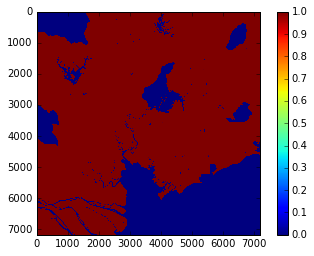

In [9]:
plt.imshow(masks['geo'])
plt.colorbar()